<img src="https://drive.google.com/uc?export=view&id=1ulQviLAnsnBLrWSQs3vXuTUsAI0vloz-" width="100%">

# Preparación del corpus

In [1]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
from IPython.display import display
plt.style.use("ggplot")

In [3]:
import pandas as pd
df = pd.read_csv('movies.csv', encoding='utf-8')

In [4]:
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].astype(str)

In [5]:
df = df[~df['genres'].astype(str).str.contains('-')]

In [6]:
df=df.drop(df[df['genres'] == 'nan'].index)

In [7]:
df = df.drop(df[df['overview'] == 'nan'].index)

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.tokenize import word_tokenize



# Tokenizar la columna 'col1'
df['col1_tokenized'] = df['overview'].apply(lambda x: word_tokenize(x))

In [10]:
import unicodedata
import re
def normalizar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Remover acentos y caracteres especiales
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
    # Remover números y puntuación
    texto = re.sub('[^A-Za-z]+', ' ', texto)
    # Eliminar espacios adicionales
    texto = re.sub(' +', ' ', texto)
    return texto.strip()

df['texto_normalizado'] = df['overview'].apply(normalizar_texto)

In [11]:
def limpiar_texto(texto):
    texto_limpio = re.sub('[^a-zA-ZñÑáéíóúÁÉÍÓÚ]', ' ', str(texto))
    return texto_limpio

# Aplicar la función de limpieza a la columna 'texto' del dataframe
df['texto_limpio'] = df['texto_normalizado'].apply(limpiar_texto)

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

def filtrar_palabras(texto):
    palabras_filtradas = []
    for palabra in texto.split():
        if palabra.lower() not in stop_words:
            palabras_filtradas.append(palabra)
    return " ".join(palabras_filtradas)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df['texto_filtrado'] = df['texto_limpio'].apply(filtrar_palabras)

In [14]:
df.drop(['texto_limpio','texto_normalizado'],axis=1)

id                                            title       genres  \
4       956101                                The Eighth Clause     Thriller   
5       965839                              Lord of the Streets       Action   
17      511617                                  Berlin Drifters        Drama   
18      267805                              There Are No Saints       Action   
19      785084                                        The Whale        Drama   
...        ...                                              ...          ...   
723007  836684                                     Dirty Dishes    Animation   
723013  774784  Portrait of an Impatient Filmmaker: Luis Buñuel  Documentary   
723015  839154                                 First Human Link  Documentary   
723021  832090                                       Boy Oh Boy    Animation   
723023  838226                               Children of Europe  Documentary   

       original_language                                           overview  \
4                     la  Kat and Borja appear to be a perfect couple bu...   
5                     en  When Jason Dyson refuses to make his prized fi...   
17                    ja  Kôichi is a Japanese man living alone in Berli...   
18                    en  A man is imprisoned for a crime he didn't comm...   
19                    en  A reclusive English teacher suffering from sev...   
...                  ...                                                ...   
723007                en  The mannequin washes the "Dirty dishes" makes ...   
723013                fr  A documentary about the making of Luis Buñuel'...   
723015                en  A look into whether a possible ancestor of man...   
723021                en            A boy conjures the stars out of yogurt.   
723023                en  Created by Theodore Andrica and narrated by hi...   

        popularity                               production_companies  \
4         2259.303                       SDB Films-El Hombre Orquesta   
5         1691.825                                       Mutiny Films   
17         918.173      Jürgen Brüning Filmproduktion-Habakari Cinema   
18         903.860  Open Window Productions-BN Films-Itaca Films-I...   
19         784.344                              A24-Protozoa Pictures   
...            ...                                                ...   
723007       0.600                                                nan   
723013       0.600                                        StudioCanal   
723015       0.600                                                nan   
723021       0.600                                                nan   
723023       0.600                     The Cleveland Press Collection   

       release_date     budget     revenue  ...  tagline vote_average  \
4        2022-04-29        0.0         0.0  ...      nan        4.600   
5        2022-04-22  1000000.0         0.0  ...      nan        4.900   
17       2017-09-10        0.0         0.0  ...      nan        5.000   
18       2022-05-27        0.0         0.0  ...      nan        5.600   
19       2022-12-09  3000000.0  32000000.0  ...      nan        7.989   
...             ...        ...         ...  ...      ...          ...   
723007   2019-06-09        0.0         0.0  ...      nan        0.000   
723013   2013-01-29        0.0         0.0  ...      nan        0.000   
723015          nan        0.0         0.0  ...      nan        7.000   
723021   2021-06-23        0.0         0.0  ...      nan        0.000   
723023   1947-06-08        0.0         0.0  ...      nan        0.000   

       vote_count                                            credits  \
4            10.0  Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...   
5            29.0  Treach-Quinton Jackson-Khalil Rountree Jr.-And...   
17            9.0  Lyota Majima-Kôichi Imaizumi-Mioo Satô-Michael...   
18           51.0  José María Yázpik-Shannyn Sossamon-Tommy 

## Implementación del Embedding

In [15]:
from gensim.models import Word2Vec
model = Word2Vec(df['col1_tokenized'], vector_size=100, window=5, min_count=3, workers=4)

In [16]:
display(model.corpus_total_words)

13104059

## Exploración del Embedding

In [17]:
words = ["amazing","experience","craziest","fear","love"]
vects = model.wv[words]
display(vects.shape)

(5, 100)

Calcular similitud entre palabras

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vects)
display(sim.shape)

(5, 5)

Se observa con mapa de calor

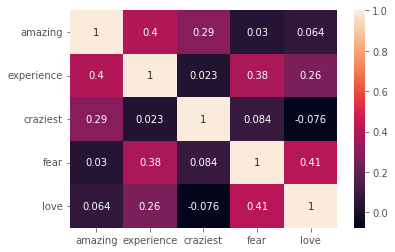

In [19]:
import seaborn as sns
fig, ax= plt.subplots()
sns.heatmap(pd.DataFrame(sim,index=words,columns=words),annot=True)
fig.show()

Nube de palabras

In [20]:
all_words = []
for word in words:
    most_similar = model.wv.most_similar(word, topn=10)
    all_words.extend(map(lambda case: case[0], most_similar))
display(all_words)

['incredible',
 'extraordinary',
 'unforgettable',
 'astonishing',
 'exciting',
 'exceptional',
 'awesome',
 'interesting',
 'exhilarating',
 'enchanting',
 'experiences',
 'odyssey',
 'vision',
 'intimacy',
 'exploration',
 'approach',
 'understanding',
 'imagination',
 'transformation',
 'universe',
 'Paris-Dakar',
 'hard-fought',
 'wildest',
 'gnarliest',
 'Capturing',
 'Witness',
 'sickest',
 'conquering',
 'Rejoin',
 'Angelhack',
 'pain',
 'loneliness',
 'anxiety',
 'anger',
 'misery',
 'guilt',
 'shame',
 'emptiness',
 'sadness',
 'frustration',
 'affection',
 'romance',
 'friendship',
 'asleep',
 'trust',
 'passion',
 'happiness',
 'hope',
 'grace',
 'faith']

(50, 100)

(50, 2)

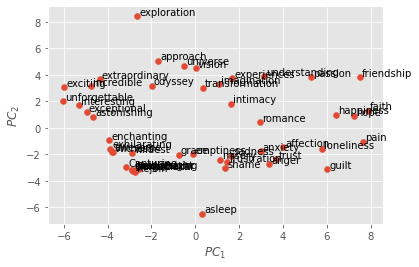

In [21]:
from sklearn.decomposition import PCA
vects = model.wv[all_words]
display(vects.shape)
X = PCA(n_components=2).fit_transform(vects)
display(X.shape)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])

for word, x, y in zip(all_words, X[:, 0], X[:, 1]):
    ax.annotate(
            word, xy = (x + 0.1, y + 0.1),
            xytext = (0, 0), textcoords = "offset points"
            )
ax.set_xlabel("$PC_1$")
ax.set_ylabel("$PC_2$")
fig.show()

In [22]:
features = np.zeros((len(df), model.vector_size))

# iterar por cada película en el DataFrame
for i, tokens in enumerate(df['texto_filtrado']):
    # obtener el vector de características correspondiente a la lista de palabras
    vec = np.mean([model.wv.get_vector(word) for word in tokens if word in model.wv], axis=0)
    # almacenar el vector de características en la matriz de características
    features[i, :] = vec


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
display(features.shape)

(254062, 100)

# Modelamiento y Evaluación
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

## **1. Tipo de Modelamiento**
---

Seleccione el tipo de modelo que puede usar para dar respuesta al problema de NLP. Recuerde que dispone de modelos que incluyen:

- **Regresión**: se busca estimar un valor continúo a partir de los textos.
- **Clasificación**: permite estimar un valor categórico a partir de los textos.
- **Agrupamiento**: permite encontrar grupos de documentos similares.
- **Modelos de tópicos**: permite encontrar temas/tópicos dentro del corpus e interpretarlo.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas desde NLP. Puede utilizar modelos pre-enternados con el fin de dar una solución.

Justifique la selección del modelo.

Se va a utilizar agrupamiento ya que nos permite organizar y categorizar grupos de texto similares. En este caso, se crea un grupo por cada categoría de la película y se selecciona donde debería estar.

## **2. Implementación del modelo**
---

A continuación encuentra los pasos que puede seguir para la implementación de un modelo:

### **2.1. Importar Modelo**
---

Seleccione la librería de NLP que utilizará para el modelo e impórtelo:

In [24]:
from sklearn.cluster import KMeans

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
k_range = np.arange(4, 11, 1)
display(k_range)

array([ 4,  5,  6,  7,  8,  9, 10])

### **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo:

Primero se eliminan los valores faltantes NaN para no tener errores en el entrenamiento del modelo

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Imputar los valores faltantes en la matriz de características
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(features)
features_imputed = imp.transform(features)

In [28]:
print(df.genres.unique())

['Thriller' 'Action' 'Drama' 'Comedy' 'Documentary' 'Horror' 'Romance'
 'Animation' 'Science Fiction' 'Fantasy' 'Music' 'Crime' 'Western'
 'Family' 'War' 'TV Movie' 'Adventure' 'Mystery' 'History']


In [29]:
print(df.genres.nunique())

19


Como se tienen 19 tipos diferentes de categorías, se usa esa cantidad como objetivo a determinar los diferentes géneros de películas como número de clusters.

In [30]:
model = KMeans(n_clusters=19).fit(features_imputed) # entrenamiento 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


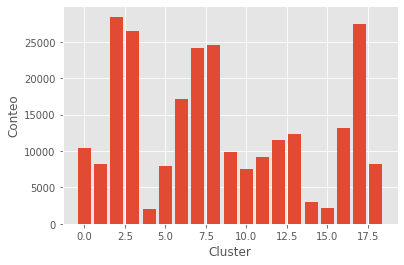

In [31]:
clusters = model.predict(features_imputed)
cats, counts = np.unique(clusters, return_counts=True)
fig, ax = plt.subplots()
ax.bar(cats, counts)
ax.set_xlabel("Cluster")
ax.set_ylabel("Conteo")
fig.show()

In [32]:
predictions = pd.DataFrame({"text": df.texto_filtrado, "cluster": clusters})
display(predictions.head())

text  cluster
4   kat and borja appear to be perfect couple but ...        3
5   when jason dyson refuses to make his prized fi...        8
17  koichi is japanese man living alone in berlin ...        3
18  man is imprisoned for crime didn t commit when...       16
19  reclusive english teacher suffering from sever...        2

In [33]:
grouped_texts = (
        predictions
        .groupby("cluster")
        .agg({"text": lambda series: " ".join(series)})
        .reset_index()
        )
display(grouped_texts)

cluster                                               text
0         0  when his wife is kidnapped by terrorists for r...
1         1  story of friendship between young convict who ...
2         2  reclusive english teacher suffering from sever...
3         3  kat and borja appear to be perfect couple but ...
4         4  amber heard and nicole kidman discuss their ch...
5         5  growing up in post world war ii arizona young ...
6         6  on the th anniversary of the publication of hi...
7         7  nina and allen split everything in their lives...
8         8  when jason dyson refuses to make his prized fi...
9         9  the last year high school excursion is the wal...
10       10  the making of james cameron s avatar it shows ...
11       11  the former world heavyweight champion rocky ba...
12       12  nala thirteen year old girl from the city trav...
13       13  father and isolated in dilapidated country hou...
14       14  the deconstruction of the avatar scenes and se...
15       15  ex zequi and company come back for new adventu...
16       16  man is imprisoned for crime didn t commit when...
17       17  laura been with antonio all her life and just ...
18       18  discussion of michael giacchino s work on the ...

In [34]:
from wordcloud import WordCloud

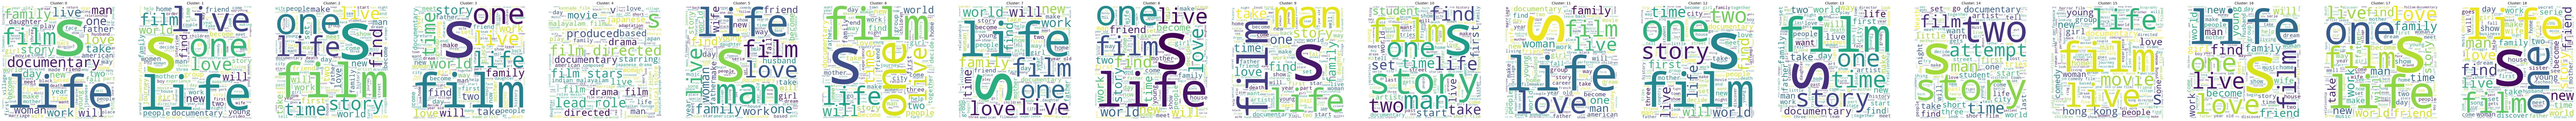

In [35]:
fig, axes = plt.subplots(
    1,
    model.n_clusters,
    figsize=(10 * model.n_clusters, 10),
    )
for cluster in range(model.n_clusters):
    ax = axes[cluster]
    ax.set_title(f"Cluster: {cluster}")
    text = grouped_texts.loc[grouped_texts.cluster == cluster, "text"].iloc[0]
    wc = WordCloud(
        background_color="#FFFFFF",
        width=500,
        height=500
        ).generate(text)
    ax.imshow(wc)
    ax.axis("off")
fig.show()

In [51]:
genres = pd.DataFrame({"genres": df.genres, "cluster": clusters})
grouped_genres = (
        genres
        .groupby("cluster")
        .agg({"genres": lambda genres:" ".join(genres)})
        .reset_index()
        )

In [55]:
grouped_genres['genres'] = grouped_genres['genres'].str.split()

In [58]:
grouped_genres

cluster                                             genres
0         0  [Action, Action, Documentary, Thriller, Drama,...
1         1  [Comedy, Horror, Drama, Horror, Comedy, Romanc...
2         2  [Drama, Thriller, Comedy, Documentary, Drama, ...
3         3  [Thriller, Drama, Romance, Horror, Horror, Dra...
4         4  [Documentary, Comedy, Drama, Crime, Documentar...
5         5  [Drama, Comedy, Animation, Comedy, Drama, Anim...
6         6  [Documentary, Romance, Drama, Horror, Horror, ...
7         7  [Comedy, Horror, Drama, Drama, Animation, Thri...
8         8  [Action, Horror, Thriller, Thriller, Action, S...
9         9  [Comedy, Comedy, Comedy, Action, Comedy, Comed...
10       10  [Documentary, Documentary, Horror, Documentary...
11       11  [Drama, Comedy, Comedy, Drama, Comedy, Comedy,...
12       12  [Horror, Horror, Comedy, Comedy, Horror, Horro...
13       13  [Thriller, Drama, Drama, Drama, Horror, Docume...
14       14  [Documentary, Horror, Horror, Romance, Comedy,...
15       15  [Comedy, Comedy, Comedy, Documentary, Drama, D...
16       16  [Action, Thriller, Horror, Romance, Romance, D...
17       17  [Comedy, Fantasy, Comedy, Comedy, Drama, Horro...
18       18  [Documentary, Comedy, Romance, Comedy, Horror,...

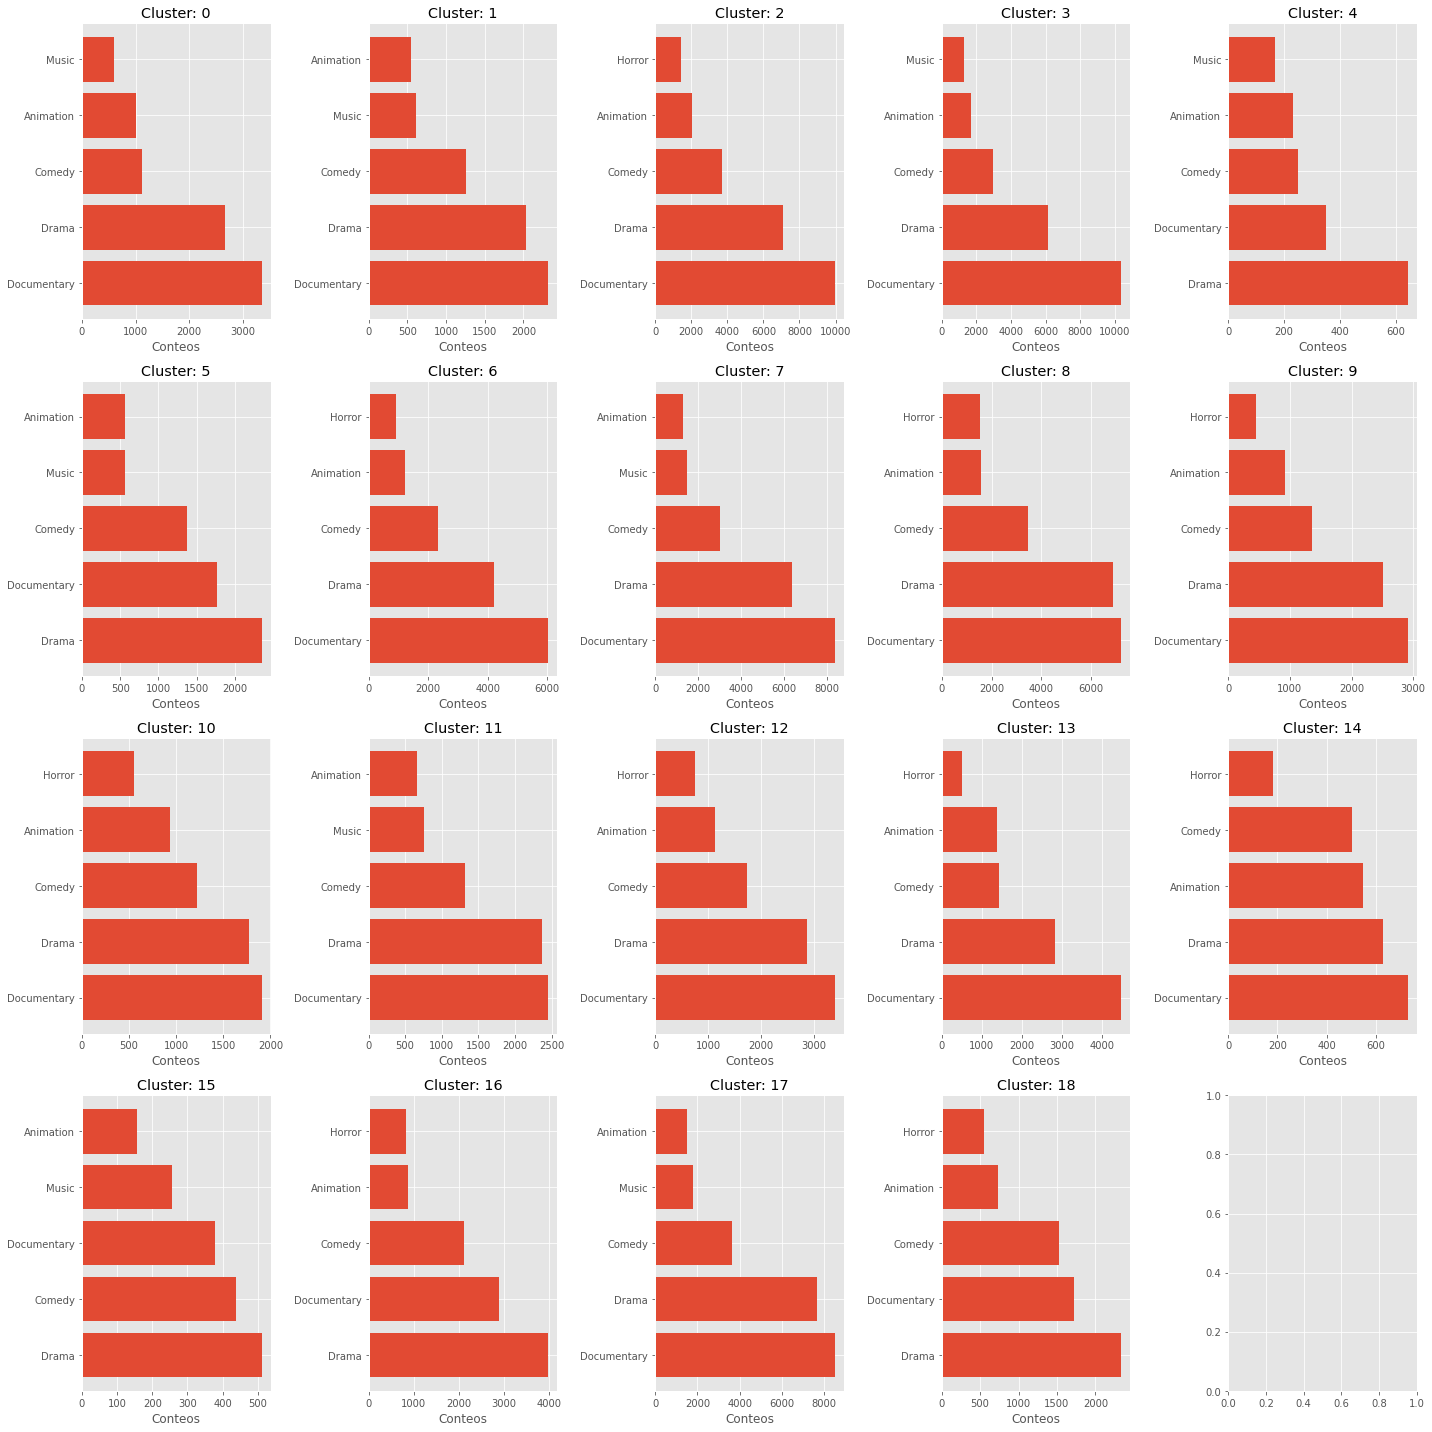

In [63]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))

for cluster in range(model.n_clusters):
    ax = axes[cluster // 5, cluster % 5]  # Ajustamos los índices de los subplots
    ax.set_title(f"Cluster: {cluster}")
    genres = grouped_genres.loc[grouped_genres.cluster == cluster, "genres"].iloc[0]
    unique, counts = np.unique(genres, return_counts=True)
    counts_df = (
            pd.DataFrame(data={"unique": unique, "counts": counts})
            .sort_values(by="counts", ascending=False)
            .head(5)
            )

    ax.barh(counts_df.unique, counts_df.counts)
    ax.set_xlabel("Conteos")
    
fig.tight_layout()
fig.show()


## **3. Evaluación o Aplicación del modelo**
---

Si entrenó un modelo, recuerde que debe reportar el desempeño del mismo sobre un conjunto de datos no visto (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin.
- **Tópicos**: perplexity, score de coherencia.

In [66]:
score = silhouette_score(
        features_imputed,
        model.predict(features_imputed)
        ) # evaluación
display(score)

0.13871573852099375

Este score nos dice que el modelo está bien asignado a los cluster, a pesar que podría mejorarse ya que lo ideal es que esté cerca a 1, nos puede dar una idea de que el modelo está bien entrenado.

In [67]:
from sklearn.metrics import davies_bouldin_score

In [68]:
score2 = davies_bouldin_score(features_imputed, model.predict(features_imputed))

In [69]:
display(score2)

1.3066640172041448

Este valor indica que los cluster generados tienen una calidad aceptable, aunque no es la óptima.

Adicionalmente, si utilizó un modelo pre-entrenado, debe generar predicciones y mostrar el resultado final de la aplicación del modelo sobre sus datos:

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*